In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from keras.layers import Dropout


In [3]:
train_data = pd.read_csv('data/train.csv')

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Explore the data more
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


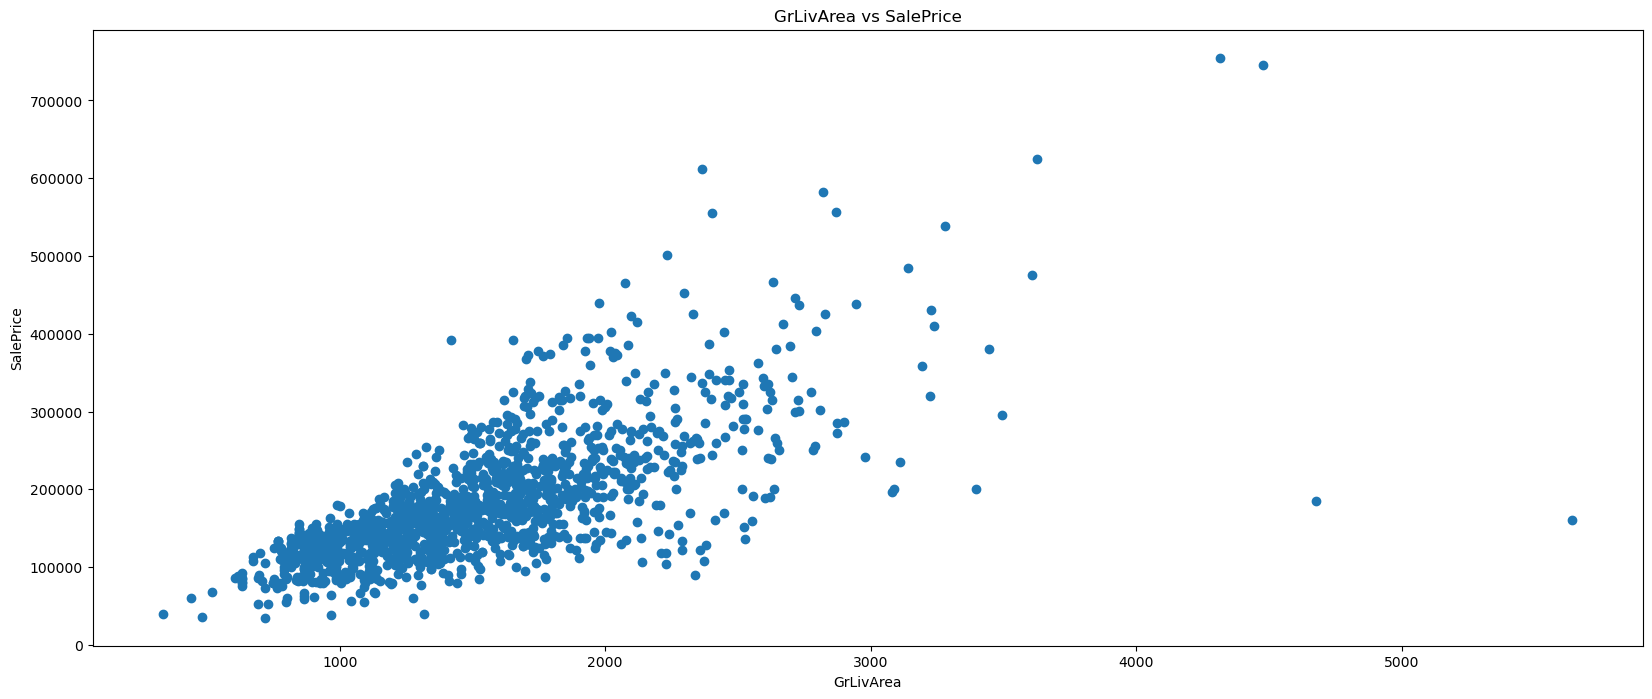

In [7]:

plt.figure(figsize=(20, 8))
plt.scatter(train_data['GrLivArea'], train_data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.show()


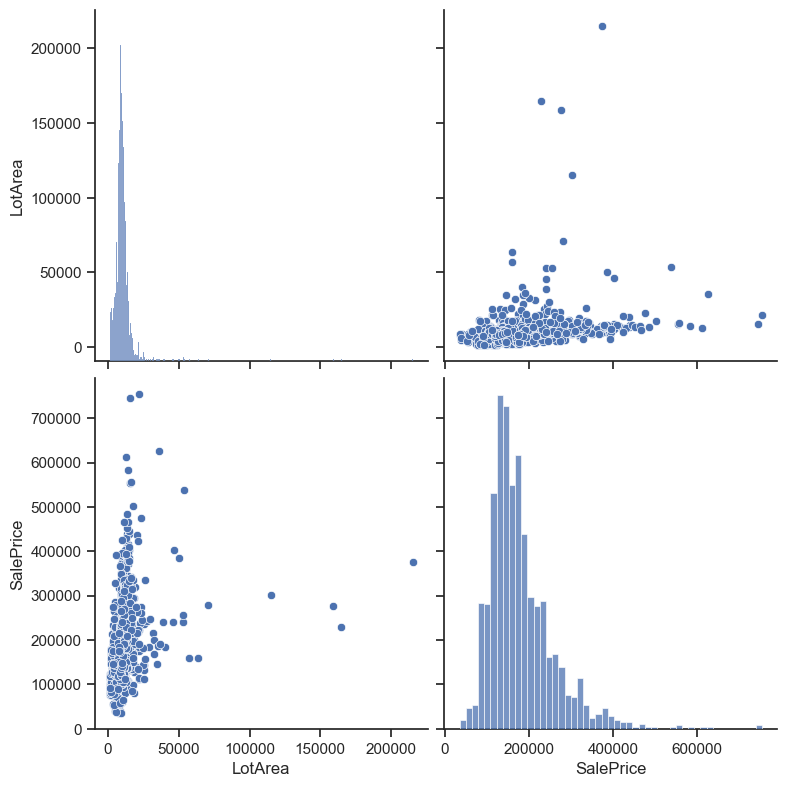

In [8]:
sns.set(style="ticks")
sns.pairplot(train_data[['LotArea', 'SalePrice']], height=4)
plt.show()


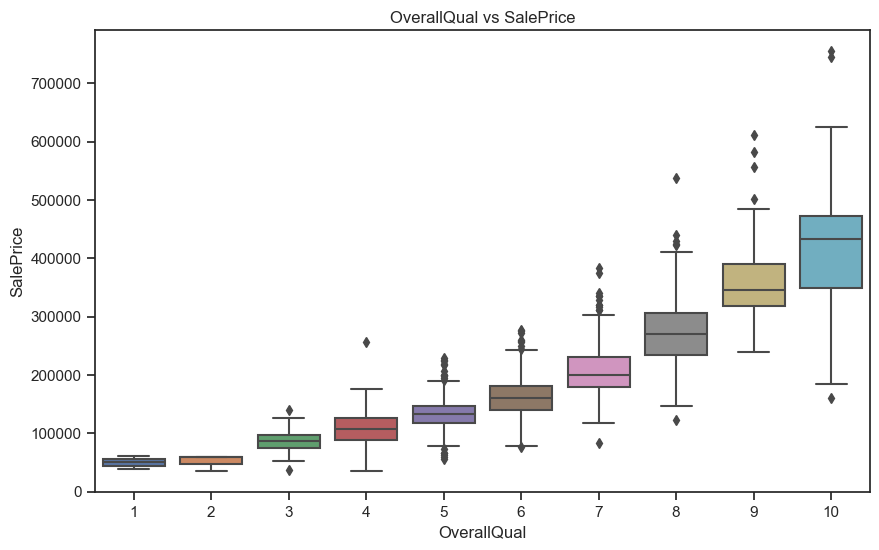

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs SalePrice')
plt.show()

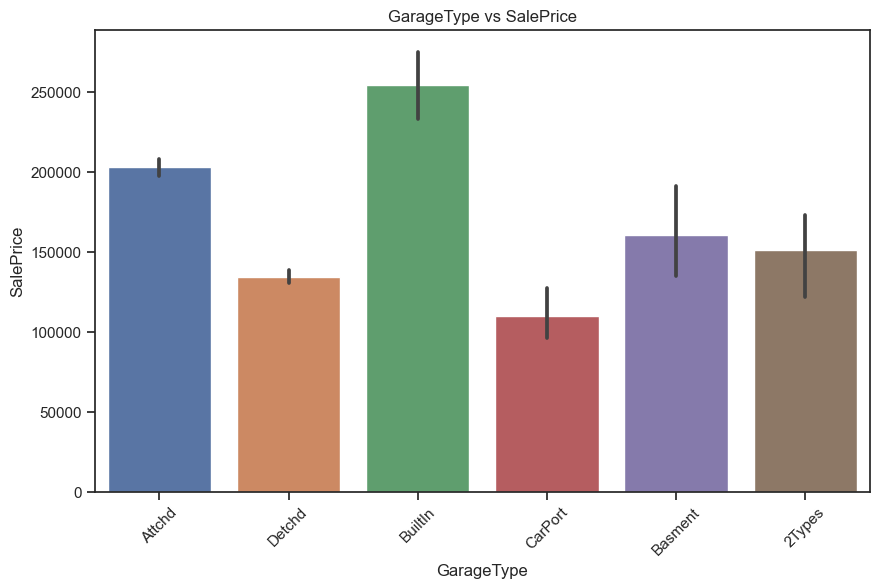

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='GarageType', y='SalePrice', data=train_data)
plt.xlabel('GarageType')
plt.ylabel('SalePrice')
plt.title('GarageType vs SalePrice')
plt.xticks(rotation=45)
plt.show()

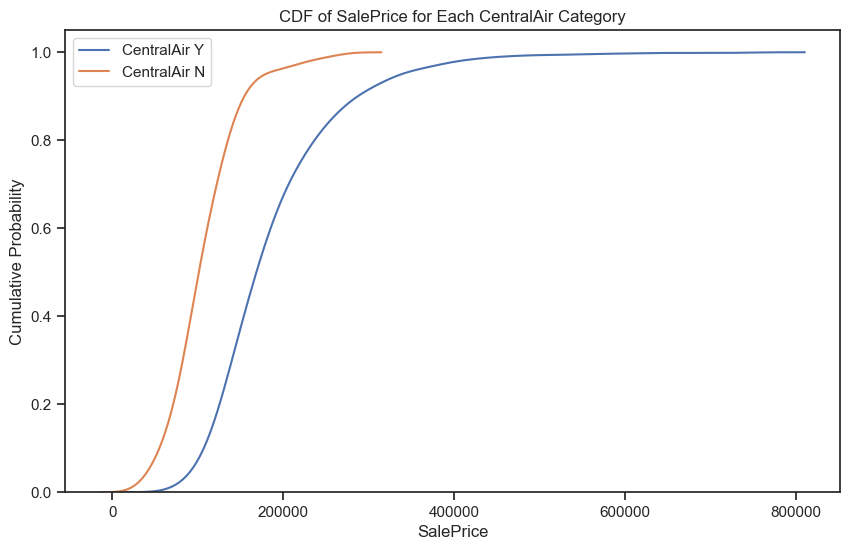

In [11]:
plt.figure(figsize=(10, 6))
for category in train_data['CentralAir'].unique():
    sns.kdeplot(train_data[train_data['CentralAir'] == category]['SalePrice'], cumulative=True, label=f'CentralAir {category}')
plt.xlabel('SalePrice')
plt.ylabel('Cumulative Probability')
plt.title('CDF of SalePrice for Each CentralAir Category')
plt.legend()
plt.show()


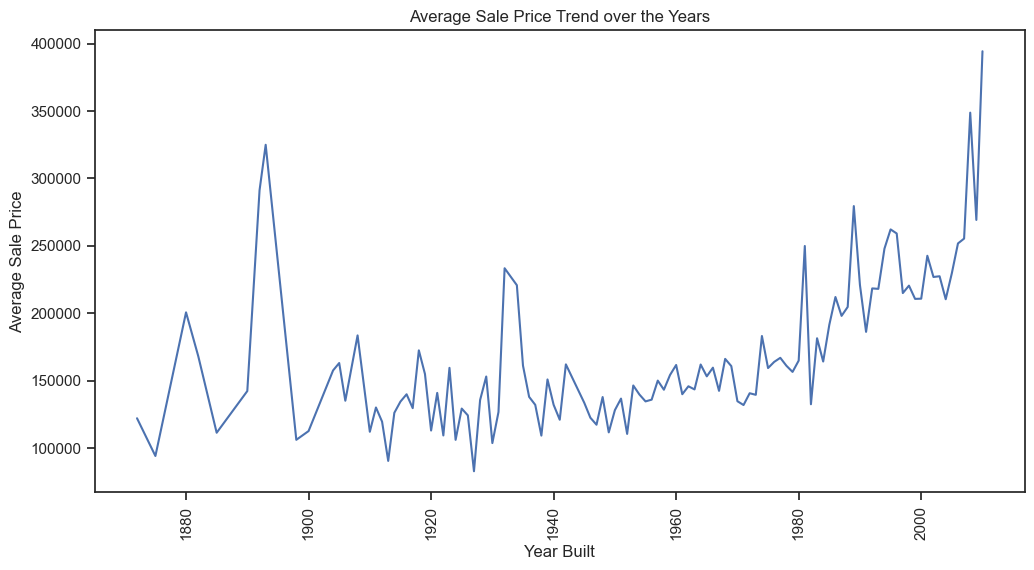

In [12]:
# Group data by YearBuilt and calculate the mean sale price for each year
average_sale_price_by_year = train_data.groupby('YearBuilt')['SalePrice'].mean()

plt.figure(figsize=(12, 6))
average_sale_price_by_year.plot()
plt.title('Average Sale Price Trend over the Years')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=90)
plt.show()

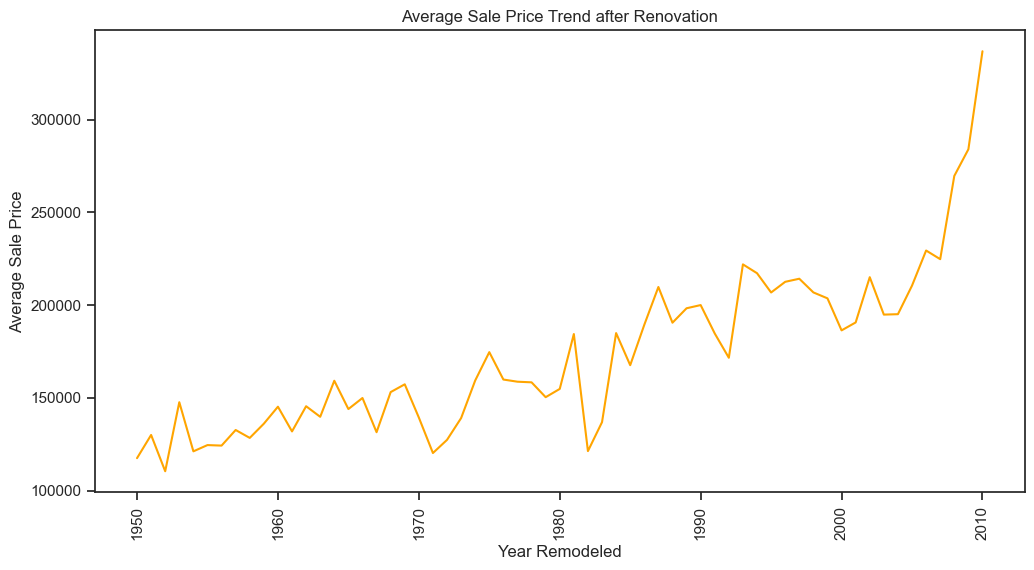

In [13]:

average_sale_price_after_renovation = train_data.groupby('YearRemodAdd')['SalePrice'].mean()

plt.figure(figsize=(12, 6))
average_sale_price_after_renovation.plot(color='orange')
plt.title('Average Sale Price Trend after Renovation')
plt.xlabel('Year Remodeled')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=90)
plt.show()

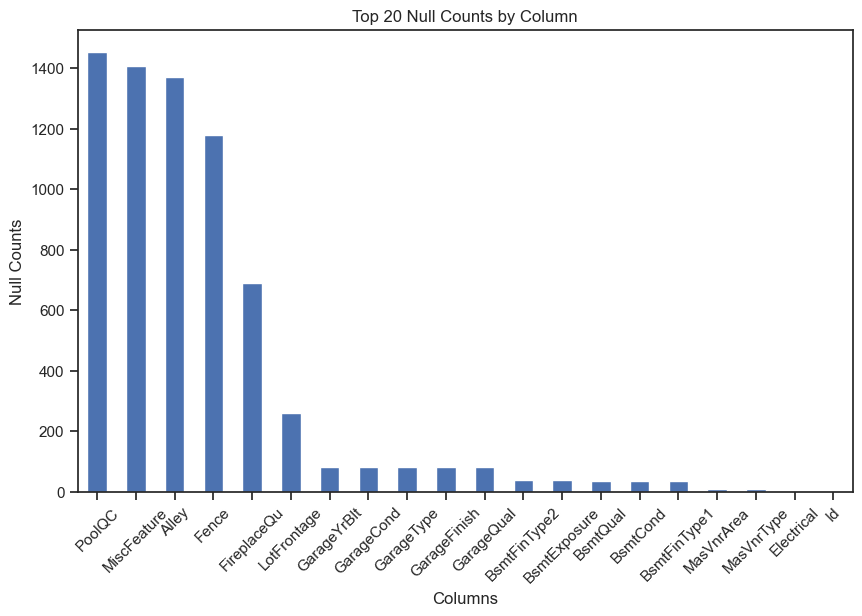

In [14]:

null_counts = train_data.isnull().sum()

sorted_null_counts = null_counts.sort_values(ascending=False)

top_20_null_counts = sorted_null_counts.head(20)

plt.figure(figsize=(10, 6))
top_20_null_counts.plot(kind='bar')
plt.title('Top 20 Null Counts by Column')
plt.xlabel('Columns')
plt.ylabel('Null Counts')
plt.xticks(rotation=45)
plt.show()



In [15]:
# Drop columns PoolQC, MiscFeature, Alley as it has more than 1000 null values and columns are not that imp
train_data.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)


In [16]:
train_data = train_data.fillna(-9999)

In [ ]:
# Did not run this kept nulls as -9999

Q1 = train_data.quantile(0.25, numeric_only=True)
Q3 = train_data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data_aligned, lower_bound_aligned = train_data.align(lower_bound, axis=1, copy=False)
train_data_aligned, upper_bound_aligned = train_data.align(upper_bound, axis=1, copy=False)

outliers = (train_data_aligned < lower_bound_aligned) | (train_data_aligned > upper_bound_aligned)

train_data_no_outliers = train_data.mask(outliers, np.nan)
train_data_no_outliers = train_data_no_outliers.fillna(train_data.median(numeric_only=True))



In [17]:
non_numeric_cols = train_data.columns[train_data.dtypes != 'int64']
train_data.loc(axis=1)[non_numeric_cols]

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,-9999,Attchd,2003.0,RFn,TA,TA,Y,-9999,WD,Normal
1,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,1976.0,RFn,TA,TA,Y,-9999,WD,Normal
2,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,2001.0,RFn,TA,TA,Y,-9999,WD,Normal
3,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,1998.0,Unf,TA,TA,Y,-9999,WD,Abnorml
4,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,2000.0,RFn,TA,TA,Y,-9999,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Attchd,1999.0,RFn,TA,TA,Y,-9999,WD,Normal
1456,RL,85.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Attchd,1978.0,Unf,TA,TA,Y,MnPrv,WD,Normal
1457,RL,66.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Gd,Attchd,1941.0,RFn,TA,TA,Y,GdPrv,WD,Normal
1458,RL,68.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,-9999,Attchd,1950.0,Unf,TA,TA,Y,-9999,WD,Normal


In [18]:
numeric_cols_train = train_data.drop(columns=non_numeric_cols)
numeric_cols_train.shape
print(numeric_cols_train.columns)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [19]:
# Train-Test-Split the data

X = numeric_cols_train.drop(columns=['SalePrice'])  # Features
y = numeric_cols_train['SalePrice']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Tried Imputation as nobody else tried this. But this is not giving the best results. 
#It may not be helping on this dataset.

imputer = SimpleImputer(strategy='most_frequent')

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

In [21]:
# Encode cataegorical variable to ensure we do not get error like 'RL' conversion from string to float.
# I used this code by referring one article as I was getting value error for 'RL'. I am not sure 100% whether 
# this is the best way to deal this or further clense the data.

X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)


categorical_cols = X_train_imputed_df.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ~X_train_imputed_df.columns.isin(categorical_cols)),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train_imputed_df = X_train_imputed_df.astype(str)
X_train_preprocessed = preprocessor.fit_transform(X_train_imputed_df)

X_test_preprocessed = preprocessor.transform(X_test_imputed_df)

### Model 1 - Random Forest Model

In [35]:

rf_model = RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=3, min_samples_leaf=2, random_state=42)

rf_model.fit(X_train_preprocessed, y_train)

y_train_pred = rf_model.predict(X_train_preprocessed)
y_test_pred = rf_model.predict(X_test_preprocessed)

rf_train_mse = mean_squared_error(y_train, y_train_pred)
rf_test_mse = mean_squared_error(y_test, y_test_pred)
rf_train_mae = mean_absolute_error(y_train, y_train_pred)
rf_test_mae = mean_absolute_error(y_test, y_test_pred)

print("Random Forest Train MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)

print("Random Forest Train MAE:", rf_train_mae)
print("Random Forest Test MAE:", rf_test_mae)


Random Forest Train MSE: 180256002.34703666
Random Forest Test MSE: 876050873.5506799
Random Forest Train MAE: 7553.068411244008
Random Forest Test MAE: 18300.144495986035


### Model 2 - Gradient Booster Model

In [36]:
gbm_model = GradientBoostingRegressor(n_estimators=300, random_state=42)
gbm_model.fit(X_train_preprocessed, y_train)

y_train_pred_gbm = gbm_model.predict(X_train_preprocessed)
y_test_pred_gbm = gbm_model.predict(X_test_preprocessed)

gbm_train_mse = mean_squared_error(y_train, y_train_pred_gbm)
gbm_test_mse = mean_squared_error(y_test, y_test_pred_gbm)

gbm_train_mae = mean_absolute_error(y_train, y_train_pred_gbm)
gbm_test_mae = mean_absolute_error(y_test, y_test_pred_gbm)


print("GBM Train MSE:", gbm_train_mse)
print("GBM Test MSE:", gbm_test_mse)

print("GBM Train MAE:", gbm_train_mae)
print("GBM Test MAE:", gbm_test_mae)

GBM Train MSE: 92625664.19165656
GBM Test MSE: 868457255.7241839
GBM Train MAE: 7206.120456418673
GBM Test MAE: 17732.53007500579


### Model 3 - Support Vector Machine (SVM) Model

In [37]:
svm_model = SVR(kernel='linear')

svm_model.fit(X_train_preprocessed, y_train)

y_train_pred_svm = svm_model.predict(X_train_preprocessed)
y_test_pred_svm = svm_model.predict(X_test_preprocessed)

svm_train_mse = mean_squared_error(y_train, y_train_pred_svm)
svm_test_mse = mean_squared_error(y_test, y_test_pred_svm)

svm_train_mae = mean_absolute_error(y_train, y_train_pred_svm)
svm_test_mae = mean_absolute_error(y_test, y_test_pred_svm)


print("Support Vector Machine Train MSE:", svm_train_mse)
print("Support Vector Machine Test MSE:", svm_test_mse)

print("Support Vector Machine Train MAE:", svm_train_mae)
print("Support Vector Machine Test MAE:", svm_test_mae)

Support Vector Machine Train MSE: 1661723598.2155378
Support Vector Machine Test MSE: 1760098495.452739
Support Vector Machine Train MAE: 22884.920936148108
Support Vector Machine Test MAE: 23764.92312740601


### Model 4 - Simple Regression Model

In [38]:
linear_model = LinearRegression()

linear_model.fit(X_train_preprocessed, y_train)

y_train_pred_linear = linear_model.predict(X_train_preprocessed)
y_test_pred_linear = linear_model.predict(X_test_preprocessed)

linear_train_mse = mean_squared_error(y_train, y_train_pred_linear)
linear_test_mse = mean_squared_error(y_test, y_test_pred_linear)

linear_train_mae = mean_absolute_error(y_train, y_train_pred_linear)
linear_test_mae = mean_absolute_error(y_test, y_test_pred_linear)

print("Simple Linear Regression Train MSE:", linear_train_mse)
print("Simple Linear Regression Test MSE:", linear_test_mse)

print("Simple Linear Regression Train MAE:", linear_train_mae)
print("Simple Linear Regression Test MAE:", linear_test_mae)

Simple Linear Regression Train MSE: 1171665128.097599
Simple Linear Regression Test MSE: 1393346690.3300648
Simple Linear Regression Train MAE: 21063.86833272446
Simple Linear Regression Test MAE: 22959.21086038633


### Model 5 Neural Networks (Deep Learning) Model

In [45]:
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=42)

model = Sequential([
    Dense(units=256, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dropout(0.1),  
    Dense(units=128, activation='relu'),
    Dropout(0.1),  
    Dense(units=64, activation='relu'),
    Dropout(0.1),  
    Dense(units=32, activation='relu'),
    Dense(units=1)  
])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

history = model.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=1000, batch_size=64, verbose=0)
y_train_pred_nn = model.predict(X_train_preprocessed)

train_loss = model.evaluate(X_train_nn, y_train_nn, verbose=0)
train_mse = train_loss 

y_val_pred_nn = model.predict(X_val_nn)

val_loss = model.evaluate(X_val_nn, y_val_nn, verbose=0)
val_mse = val_loss ** 0.5  
val_mae = mean_absolute_error(y_val_nn, y_val_pred_nn)

print("Neural Network Training RMSE:", train_mse)
print("Neural Network Validation RMSE:", val_mse)
print("Neural Network Validation MAE:", val_mae)


8/8 [==============================] - 0s 2ms/step
Neural Network Training RMSE: 1202935936.0
Neural Network Validation RMSE: 39938.317240464705
Neural Network Validation MAE: 25361.763154380344


### Model 6 - XG Boost 

In [43]:
# Define your XGBoost regressor model with desired parameters
xgb_model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_train_pred_xgb = xgb_model.predict(X_train_preprocessed)
y_test_pred_xgb = xgb_model.predict(X_test_preprocessed)

xgb_train_mae = mean_absolute_error(y_train, y_train_pred_xgb)
xgb_test_mae = mean_absolute_error(y_test, y_test_pred_xgb)

print("XGBoost Train MAE:", xgb_train_mae)
print("XGBoost Test MAE:", xgb_test_mae)


XGBoost Train MAE: 6340.264250454838
XGBoost Test MAE: 16896.233585723458
